In [77]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, LassoCV, LinearRegression
from numpy.linalg import inv
from sklearn.model_selection import KFold

In [3]:
url = 'https://bitbucket.org/portierf/shared_files/downloads/data_dm3.csv'
df = pd.read_csv(url, sep=',',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0


# Q1

Préciser le nombre de variables explicatives et le nombre d’observations.

In [4]:
num_dfX_cols = df.shape[1] - 1
dfX = df.drop(num_dfX_cols, axis=1)
dfX.head()

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.937546,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,0.940726,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,0.338998,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.733290,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,-0.714867,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853


In [5]:
dfY = df[num_dfX_cols]
dfY.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: 210, dtype: float64

In [6]:
print("Nombre de variable explicatives:", dfX.shape[1])
print("Numbre d'observations", dfX.shape[0])

Nombre de variable explicatives: 210
Numbre d'observations 442


# Q2

Les variables explicatives sont-elles centrées ? Normalisées ? Qu’en est-il de la variable à
expliquer ? Tracer un scatter plot de la base de données avec 4 covariables prises au hasard
et la variable à expliquer

In [7]:
dfX.mean()

0      7.535450e-19
1     -1.507090e-17
2      5.494599e-20
3     -7.284269e-18
4      8.288995e-18
           ...     
205    5.525997e-18
206    3.265362e-17
207    1.507090e-17
208   -4.034606e-18
209    1.205672e-17
Length: 210, dtype: float64

In [8]:
dfX.var()

0      1.002268
1      1.002268
2      1.002268
3      1.002268
4      1.002268
         ...   
205    1.002268
206    1.002268
207    1.002268
208    1.002268
209    1.002268
Length: 210, dtype: float64

In [9]:
dfY.mean()

152.13348416289594

In [10]:
dfY.var()

5943.331347923785

Les variables explicatives sont centrés car ses moyennes proches de 0
le variable à expliquer est non centré

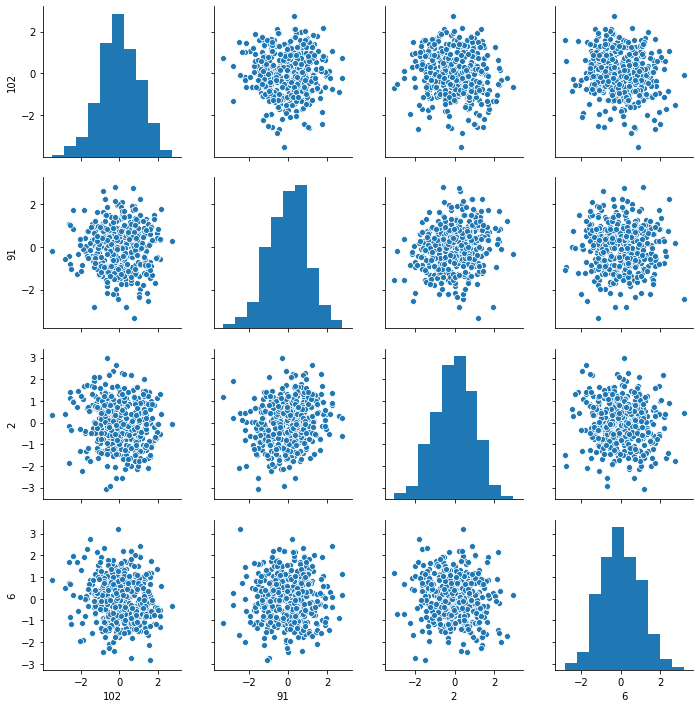

In [11]:
rand_cols = [np.random.randint(0,209) for i in range(4)]
sns_plot = sns.pairplot(dfX[rand_cols])

Les variables explicatives sont sparse.

# Q3

Echantillon d’apprentissage et de test.

In [25]:
X = np.matrix(dfX)
Y = np.matrix(dfY).T
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("X test shape:", X_test.shape)
print("X train shape:", X_train.shape)
print("Y test shape:", Y_test.shape)
print("Y train shape:", Y_train.shape)

X test shape: (89, 210)
X train shape: (353, 210)
Y test shape: (89, 1)
Y train shape: (353, 1)


# Q4

Donner la matrice de covariance calculée sur Xtrain. Tracer le graphe de la décroissance des
valeurs propres de la matrice de covariance (ou de corrélation). Expliquer pourquoi il est
légitime de ne garder que les premières variables de l’ACP. On gardera 60 variables dans
la suite.

In [26]:
X_train_cov = np.cov(X_train)

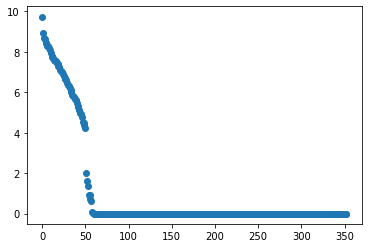

In [27]:
u,s,v = np.linalg.svd(X_train_cov)
plt.scatter(range(len(s)), s)

On constate qu'il y a seulement 60 des valeurs propres de la matrice de corrélation ne sont pas nulles.On gardera 60 variables dans
la suite.

# Q5

Suivant les observations de la question (Q4), appliquer la méthode de "PCA before OLS"
qui consiste à appliquer OLS avec Y et XtrainV(1:60), où V(1:60) contient les vecteurs propres
(associés aux 60 plus grandes valeurs propres) de la matrice de covariance. Faire une régression linéaire (avec intercept), puis tracer les valeurs des coefficients (hors intercept).
Sur un autre graphique, faire de même avec la méthode des moindres carrés classique.

In [28]:
pca = PCA(n_components=60)
Xpca=pca.fit_transform(X_train)
Model_PCA_before_OLS = LinearRegression(fit_intercept=True).fit(Xpca, Y_train)

Text(0.5, 1.0, 'Model_PCA_before_OLS')

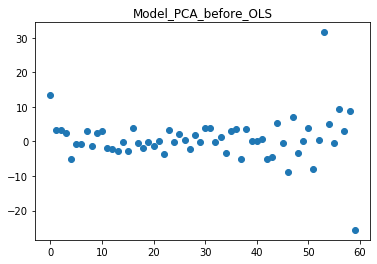

In [30]:
plt.scatter(range(Model_PCA_before_OLS.coef_.shape[1]),Model_PCA_before_OLS.coef_)
plt.title('Model_PCA_before_OLS')

In [31]:
Model_OLS = LinearRegression(fit_intercept=True).fit(X_train, Y_train)

Text(0.5, 1.0, 'Model_OLS')

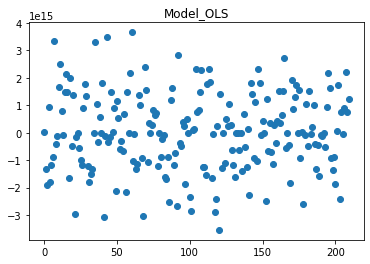

In [33]:
plt.scatter(range(Model_OLS.coef_.shape[1]),Model_OLS.coef_)
plt.title('Model_OLS')

# Q6

Donner les valeurs des intercepts pour les 2 régressions précédentes. Donner la valeur
moyenne de la variable Y (sur le train set). Les intercepts des 2 questions sont-ils égaux ?
Commenter. Uniquement pour cette question, centrer et réduire les variables après ACP
(de petite dimension). Faire une régression avec ces variables et vérifier que l’intercept est
bien égal à la moyenne de Y sut le train.

In [34]:
print("Intercept OLS:", Model_OLS.intercept_)
print("Intercept PCA before OLS:", Model_PCA_before_OLS.intercept_)
print('Mean Y_train:',Y_train.mean())

Intercept OLS: [153.88748229]
Intercept PCA before OLS: [151.60623229]
Mean Y_train: 151.60623229461757


Intercept PCA before OLS est bien égale à la moyenne de Y_train. 

# Q7

Tracer les résidus de la prédiction sur
l’échantillon test. Tracer leur densité (on pourra par exemple utiliser un histogramme).
Calculer le coefficient de détermination sur l’échantillon test. Calculer le risque de prédiction
sur l’échantillon test.

Text(0.5, 0, 'Observations')

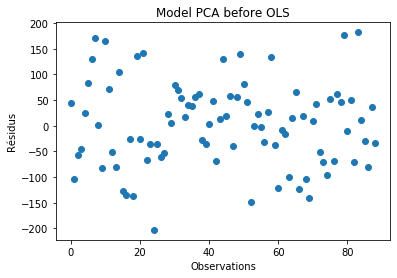

In [39]:
Y_pred_pca = Model_PCA_before_OLS.predict(pca.fit_transform(X_test))
res_pca = Y_test - Y_pred_pca

plt.scatter(range(len(res_pca)), [r[0] for r in res_pca])
plt.title("Model PCA before OLS")
plt.ylabel("Résidus")
plt.xlabel("Observations")

Text(0.5, 0, 'Observations')

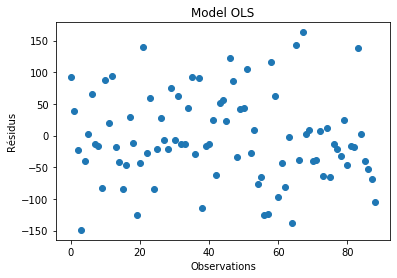

In [41]:
Y_pred_ols = Model_OLS.predict(X_test)
res_ols = Y_test - Y_pred_ols
plt.scatter(range(len(res_ols)), [r[0] for r in res_ols])
plt.title("Model OLS")
plt.ylabel("Résidus")
plt.xlabel("Observations")

Text(0.5, 1.0, 'OLS')

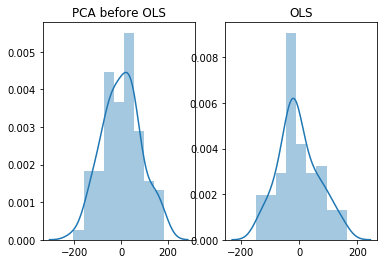

In [37]:
f, axes = plt.subplots(1, 2)
fig1 = sns.distplot(res_pca, kde=True, ax=axes[0])
fig2 = sns.distplot(res_ols, kde=True, ax=axes[1])
axes[0].set_title("PCA before OLS")
axes[1].set_title("OLS")

In [45]:
R_pred_pca_ols = ((Y_test - Y_pred_pca).T@(Y_test - Y_pred_pca)/len(Y_test))[0,0]
R_pred_ols = ((Y_test - Y_pred_ols).T@(Y_test - Y_pred_ols)/len(Y_test))[0,0]

print("R_pred PCA before OLS:", R_pred_pca_ols)
print("R_pred OLS:", R_pred_ols)

R_pred PCA before OLS: 6743.210675100125
R_pred OLS: 4708.21807077012


# Q8

Coder la méthode de forward variable sélection. On pourra utiliser la statistique du test de
nullité du coefficient (comme vu en cours). Pour l’instant, on ne met pas de critère d’arret
sur la méthode. C’est à dire que l’on ajoute une variable à chaque étape jusqu’à retrouver
la totalité des variables. Afficher l’ordre de séléction des variables.

In [62]:
def get_p_value(t_stat, deg):
    p_val = (1 - stats.t.cdf(abs(t_stat), deg)) * 2
    return p_val

def get_X(X_tild):
    X_tild = X_tild.tolist()
    X = [[1] +  X_tild[i] for i in range(0, len(X_tild))]
    return np.matrix(X)

def get_mean(Y):
    return sum(Y) / len(Y)

def rand():
    return random.randint(0, dfX.shape[1] - 1)


def fast_forward_selection(X_train, Y_train, stop=1000):
    p = X_train.shape[1]
    n = X_train.shape[0]
    res_prev = Y_train
    X = get_X(X_train)
    col_maxs = []
    pvalues = []
    tstats = []
    for i in range(p + 1):
        col_max = 0
        tstat_max = 0
        tstats_j = []
        for j in range(p + 1):
            if j not in col_maxs:
                X_j = X[:, j]
                model_j = LinearRegression(fit_intercept=False).fit(X_j, res_prev)
                X_j_bar = get_mean(X_j)
                Y_pred = model_j.predict(X_j)
                res_new = Y_train - Y_pred
                sigma_est = np.sqrt(1 / (n - 1) * (res_new.T@res_new)[0,0])
                tstat = abs(model_j.coef_[0,0]) / (sigma_est * np.sqrt(inv(X_j.T@X_j)[0,0])) 
                tstats_j.append(tstat)
                if tstat > tstat_max:
                    col_max = j
                    tstat_max = tstat

        pvalue = get_p_value(tstat_max, n - 1)
        if pvalue < stop:
            res_prev = res_new
            col_maxs.append(col_max)
            pvalues.append(pvalue)
            tstats.append(tstats_j)
        else:
            return [[c - 1 for c in col_maxs[1:]], pvalues, tstats]

    return [[c - 1 for c in col_maxs[1:]], pvalues, tstats]

In [63]:
result = fast_forward_selection(X_train, Y_train)
print("Ordre de selection des variables:", result[0])
print("pvalues", result[1])

Ordre de selection des variables: [123, 58, 34, 174, 167, 23, 99, 133, 112, 168, 25, 85, 169, 77, 200, 138, 17, 146, 79, 20, 208, 131, 121, 136, 22, 4, 53, 141, 158, 135, 9, 3, 37, 98, 5, 13, 152, 172, 205, 194, 43, 154, 71, 28, 104, 90, 96, 155, 113, 106, 47, 84, 129, 46, 59, 76, 145, 144, 149, 39, 147, 105, 45, 176, 32, 132, 26, 83, 116, 180, 159, 93, 177, 127, 156, 57, 119, 108, 109, 196, 165, 114, 110, 111, 81, 18, 68, 7, 162, 118, 181, 185, 41, 21, 182, 120, 42, 73, 126, 60, 78, 184, 10, 148, 70, 50, 191, 188, 103, 130, 19, 190, 94, 61, 64, 11, 27, 140, 0, 139, 44, 150, 66, 164, 72, 107, 12, 192, 38, 49, 86, 2, 207, 122, 80, 54, 82, 198, 15, 1, 100, 183, 204, 209, 157, 125, 89, 40, 117, 128, 33, 31, 74, 92, 14, 95, 115, 201, 134, 65, 91, 170, 199, 151, 62, 193, 166, 63, 24, 179, 206, 102, 52, 197, 187, 101, 142, 35, 29, 161, 69, 203, 195, 6, 67, 178, 30, 189, 97, 36, 186, 175, 202, 16, 87, 153, 51, 56, 143, 137, 8, 173, 88, 124, 171, 55, 48, 163, 75, 160]
pvalues [0.0, 2.499087892

# Q9
Critère d’arrêt : On décide d’arrêter lorsque la p-valeur dépasse 0.1. Illustrer la méthode
en donnant (i) les 3 graphes des statistiques obtenues lors de la sélection de la 1er, 2eme
et 3eme variables (en abscisse : l’index des variables, en ordonné : la valeur des stats) , (ii)
le graphe des 50 premières p-valeurs (dont chacune est associée à la variable sélectionnée).
Sur ce même graphe, on tracera la ligne horizontale d’ordonnée 0.1. Enfin on donnera la
liste des variables sélectionnées

Text(0, 0.5, 'la valeur des stats')

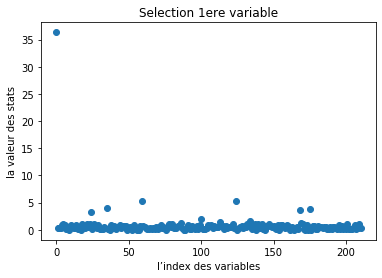

In [67]:
result = fast_forward_selection(X_train, Y_train,0.1)
y = result[2][0]
x = list(range(len(y)))
plt.scatter(x, y)
plt.title("Selection 1ere variable")
plt.xlabel("l’index des variables")
plt.ylabel("la valeur des stats")

Text(0, 0.5, 't-Stat')

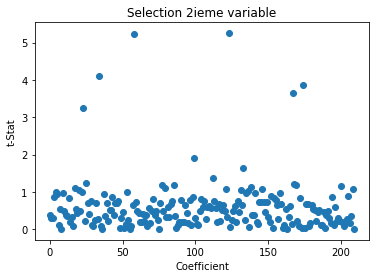

In [65]:
y = result[2][1]
x = list(range(len(y)))
plt.scatter(x, y)
plt.title("Selection 2ieme variable")
plt.xlabel("l’index des variables")
plt.ylabel("la valeur des stats")

Text(0, 0.5, 't-Stat')

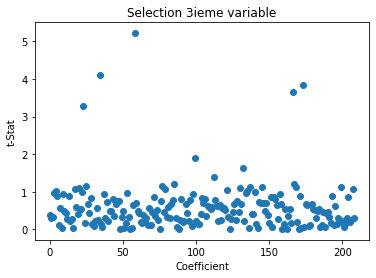

In [66]:
y = result[2][2]
x = list(range(len(y)))
plt.scatter(x, y)
plt.title("Selection 3ieme variable")
plt.xlabel("l’index des variables")
plt.ylabel("la valeur des stats")

# Q10
Appliquer OLS sur les variables sélectionnées. Donner le risque de prédiction obtenu l’échantillon test et le comparer à ceux de OLS et PCA before OLS.


In [75]:
X_train_forward = X_train[:,result[0]]
X_test_forward = X_test[:,result[0]]
Model_OLS_forward = LinearRegression(fit_intercept=True).fit(X_train_forward, Y_train)
Y_pred_ols_forward = Model_OLS_forward.predict(X_test_forward)
R_pred_ols_forward = ((Y_test - Y_pred_ols_forward).T@(Y_test - Y_pred_ols_forward)/len(Y_test))[0,0]
print('R_pred for fast forward selection OLS:',R_pred_ols_forward)

R_pred for fast forward selection OLS: 3500.288800196728


R_pred_ols_forward est bien plus petit que le R_pred_ols et R_pred_pca

# Q11
Afin de préparer la validation croisée, séparer l’échantillon train en 4 parties (appelées
”folds”) de façon aléatoire. On affichera les numéros d’échantillon sélectionnés dans chaque
fold.

In [95]:
kf = KFold(n_splits=4, random_state=10, shuffle=True)
folds = kf.split(X_train)
tab_folds=[]
i=1
for train_index , test_index in folds:
    print('Fold',i)
    print('train_index:%s , test_index: %s ' %(train_index,test_index))
    tab_folds.append([train_index, test_index])
    i += 1

Fold 1
train_index:[  0   2   3   4   5   7   8   9  10  11  13  14  15  16  18  19  21  22
  23  28  30  31  32  33  35  36  37  38  39  40  41  42  44  45  46  48
  49  50  51  53  54  55  58  59  60  61  62  63  66  67  68  70  71  72
  73  74  75  77  79  81  82  83  84  85  86  89  90  91  93  94  95  96
  98  99 101 103 104 106 107 108 109 111 112 115 116 117 118 119 120 122
 123 124 125 127 128 129 131 132 133 134 135 136 137 140 141 143 144 145
 149 150 153 154 155 156 157 158 159 160 161 162 165 166 168 169 171 176
 177 178 179 180 182 184 185 186 187 188 190 191 192 193 194 195 196 198
 199 200 201 203 204 206 207 208 209 210 212 213 214 216 217 220 221 222
 223 224 226 228 230 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 246 248 249 250 251 252 253 254 255 256 258 259 260 261 262 263 265
 267 268 269 270 271 273 274 275 276 279 281 283 284 285 286 287 288 289
 290 291 292 293 294 295 297 298 299 300 302 304 305 306 307 308 309 311
 312 313 315 316 318 319 320 321

# Q12
Appliquer la méthode de la régression ridge. Pour le choix du paramètre de régularisation,
on fera une validation croisée sur les ”folds” définies lors de la question précédente. A
tour de rôle chacune des ”folds” servira pour calculer le risque de prédiction alors que
les autres seront utilisées pour estimer le modèle. On moyennera ensuite les 4 risques de
prédictions. On donnera la courbe du risque de validation croisée en fonction du paramètre
de régularisation (on veillera à bien choisir l’espace de définition pour le graphe). Donner
le paramètre de régularisation optimal et la valeur du risque sur le test.

In [104]:
ridge_param = np.linspace(0, 100, 10)
def fit_ridge(X, Y, tab_folds):
    R_pred_bars = []
    for alpha in ridge_param:
        R_preds = []
        for train_index, test_index in tab_folds:
            clf = Ridge(alpha=alpha)
            clf.fit(X[train_index], Y[train_index])
            Y_pred = clf.predict(X[test_index])
            R_pred = ((Y[test_index]-Y_pred).T@(Y[test_index]-Y_pred)/len(Y[test_index]))[0,0]
            R_preds.append(R_pred)

        R_pred_bar = np.mean(R_preds)
        R_pred_bars.append(R_pred_bar)
    return R_pred_bars

R_ridge = fit_ridge(X_train, Y_train, tab_folds)
print(R_ridge)

[11938.848533105647, 3551.2594275786664, 3551.4039512517306, 3557.536144907713, 3567.0536331616695, 3578.7584343402477, 3591.915438386895, 3606.030611803226, 3620.7589101045132, 3635.8546294232215]


Le parametre Ridge optimal est: 11.11111111111111
Le min risque est: 3551.2594275786664


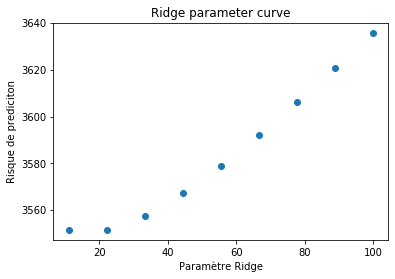

In [110]:
plt.scatter(ridge_param[1:], R_ridge[1:])
plt.title("Ridge parameter curve")
plt.xlabel("Paramètre Ridge")
plt.ylabel("Risque de prediciton")
print("Le parametre Ridge optimal est:", ridge_param[np.argmin(R_ridge)])
print("Le min risque est:", min(R_ridge))


# Q13
A l’aide de la fonction lassoCV de sklearn, choisir le paramètre de régularisation du LASSO.
Donner le risque de prédiction associé.

In [118]:
Model_lasso = LassoCV(cv=4)
Model_lasso.fit(X_train, Y_train)
Y_pred_lasso = Model_lasso.predict(X_test)
R_pred_lasso = ((Y_test-Y_pred_lasso).T@(Y_test-Y_pred_lasso)/len(Y_test))[0,0]
print("Risque de prediction lasso: ", R_pred_lasso)


/home/lixi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Risque de prediction lasso:  10827.372639554336


# Q14
Donner les variables selectionées par le lasso. Combien y-en a t-il ? Appliquer la méthode
OLS aux variables sélectionnées. Cette méthode est appelé Least-square LASSO.

In [121]:
lasso_selected_cols = [i for i, c in enumerate(Model_lasso.coef_) if c]
print("Le parametre Lasso optimal est", Model_lasso.alpha_)
print("Les colonnes", lasso_selected_cols)


Le parametre Lasso optimal est 4.289603058034452
Les colonnes [13, 17, 30, 43, 58, 59, 79, 112, 117, 123, 129, 130, 131, 135, 159, 167, 168, 172, 174, 208]


In [122]:
Model_ols_lasso = LinearRegression()
Model_ols_lasso.fit(X_train[:,lasso_selected_cols], Y_train)
Y_pred_ols_lasso = Model_ols_lasso.predict(X_test[:,lasso_selected_cols])
R_pred_ols_lasso = ((Y_test-Y_pred_ols_lasso).T@(Y_test-Y_pred_ols_lasso)/len(Y_test))[0,0]
print("Le risque de prediciton de Least-square Lasso est ", R_pred_ols_lasso)

Le risque de prediciton de Least-square Lasso est  3799.806570539676
